In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
df = pd.read_csv('Dataset\IMDB-Dataset.csv')

In [16]:
def func(percent, all_values):
    absolute = int(percent / 100.*np.sum(all_values))
    return "{:.1f}%\n({:d})".format (percent, absolute)

### Thống kê số lượng nhãn trong dataset

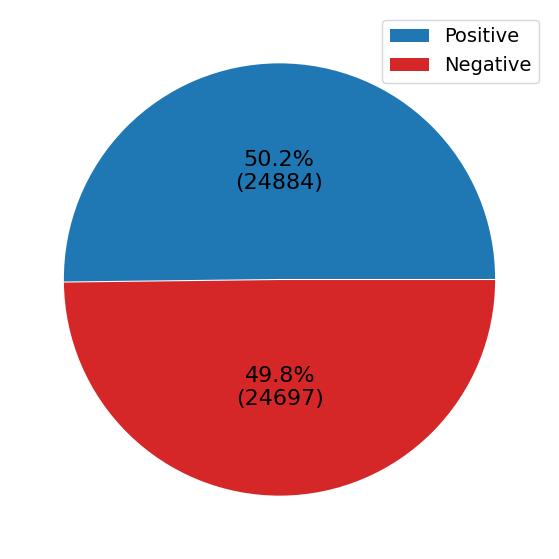

In [18]:
freq_pos = len(df[df['sentiment'] == 'positive'])
freq_neg = len(df[df['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]

pie, ax = plt.subplots(figsize = [11, 7])
plt.pie(x=data,
        autopct=lambda percent: func(percent, data),
        explode=[0.0025]*2,
        pctdistance=0.5,
        colors=[sns.color_palette()[0], 'tab:red'],
        textprops={'fontsize': 16})

labels = [r'Positive', r'Negative']

plt.legend(labels, loc='best', prop={'size': 14})
pie.savefig("PieChart.png")
plt.show()

### Thống kê độ dài mẫu cho mỗi class trong dataset

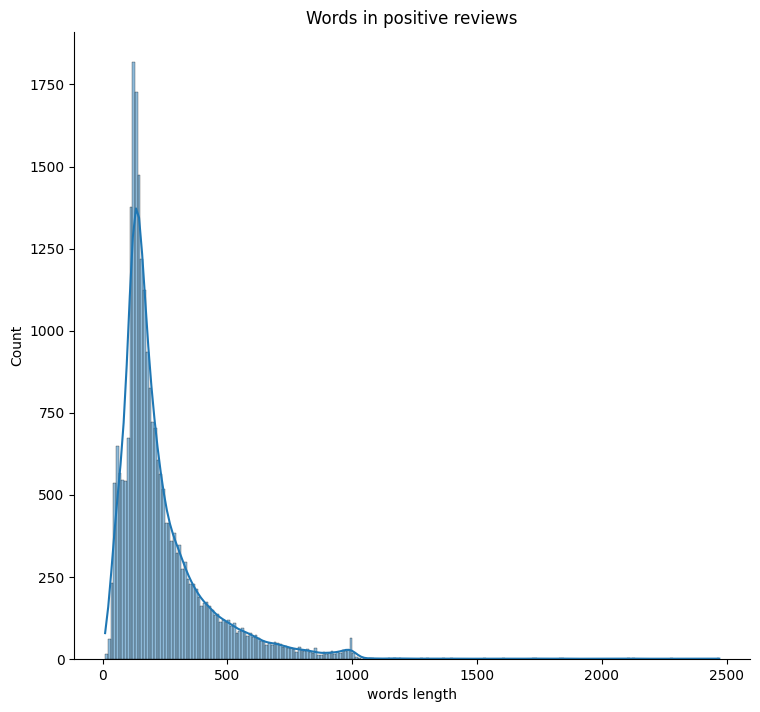

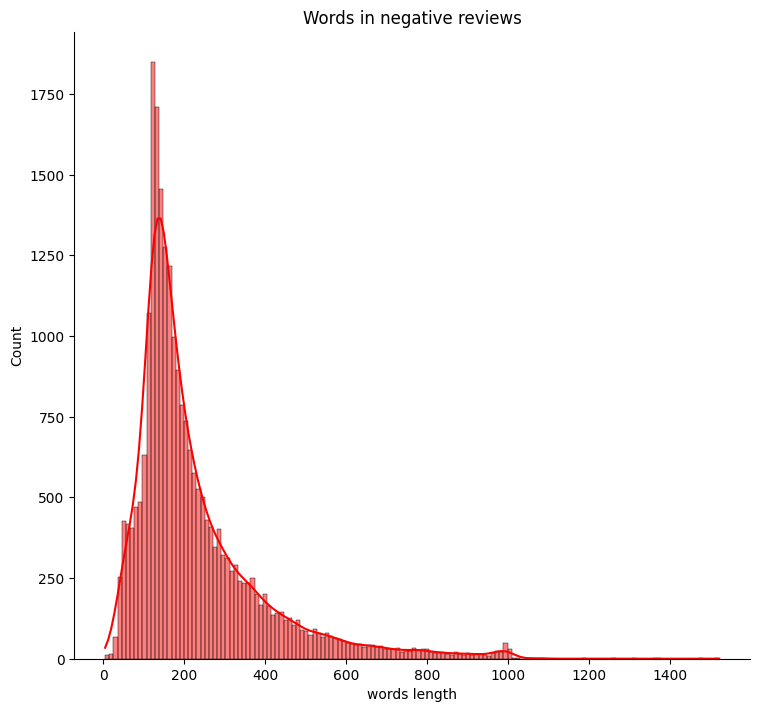

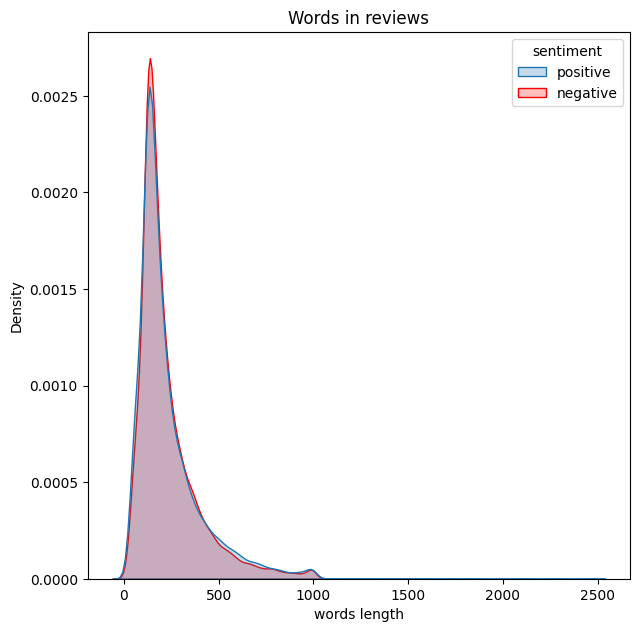

In [20]:
words_len = df['review'].str.split().map(lambda x: len(x))

df_temp = df.copy()
df_temp['words length'] = words_len

hist_pos = sns.displot(
    data = df_temp[df_temp['sentiment'] == 'positive'],
    x = 'words length',
    hue = 'sentiment',
    kde = True,
    height = 7,
    aspect=1.1,
    legend=False
).set(title='Words in positive reviews')
plt.show(hist_pos)

hist_neg = sns.displot(
    data = df_temp[df_temp['sentiment'] == 'negative'],
    x = 'words length',
    hue = 'sentiment',
    kde = True,
    height = 7,
    aspect=1.1,
    legend=False,
    palette=['red']
).set(title='Words in negative reviews')
plt.show(hist_neg)

plt.figure(figsize=(7, 7.1))
kernel_distribution_number_of_words_plot = sns.kdeplot(
    data = df_temp,
    x='words length',
    hue='sentiment',
    fill=True,
    palette=[sns.color_palette()[0], 'red']
).set(title ='Words in reviews')
plt.show(kernel_distribution_number_of_words_plot)

**=> Dữ liệu cân bằng**